### Homework 3. MaryamAlomair

## libraries and packages

In [459]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random 
import seaborn as sns

from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

## Explore the Data

In [365]:
faithful = pd.read_csv('faithful.csv')
df1 = pd.DataFrame(faithful)
df= df1.astype(float).values.tolist()

In [ ]:
df.head(5)

In [ ]:
df.describe()

In [ ]:
x = df['waiting']
plt.hist(x, bins=10)
plt.ylabel('Distribution')
plt.xlabel('Waiting');

In [ ]:
x = df['eruptions']
plt.hist(x, bins=10)
plt.ylabel('Distribution')
plt.xlabel('Eruptions');

# Problem1

#### (a) Create and print out a scatter plot of this dataset, eruption time versus waiting time. 

## scatter plot

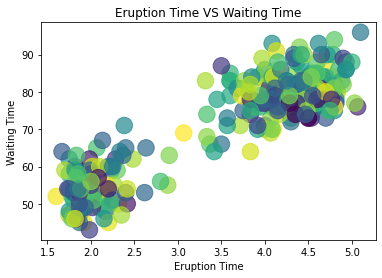

In [272]:
x = df['eruptions']
y = df['waiting']
colors = np.random.rand(272)
area = len(df)

plt.scatter(x, y, s= area, c=colors, alpha=0.7)
plt.title("Eruption Time VS Waiting Time")
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time")
plt.savefig('Eruption Time VS Waiting Time.png')
plt.show()

#### (b) How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a "blob" of many data points that are close together, with regions of fewer data points between it and other "blobs"/clusters.!

ANS: There are two clusters separated.

#### (c) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? 

ANS: The basic algorithm of Agglomerative steps:
Each data point sets as a cluster, so we will have 272 clusters at the beginning.
Compute the proximity matrix (based on the two closest points in the different clusters).
After several computation and clustering. and the other dots are in single clusters.  Also, proximity matrix will be computed. 
Finally, The final result is one big cluster.

Since there are some close points that belong to different clusters, hierarchical clustering algorithm seems to  not be appropriate for this dataset.

# Problem2

## K-mean Algorithm

#### (a) Your source code for the k-means algorithm. You need to implement the algorithm from scratch. 

In [450]:
# Add two columns for the original dataframe; for calculated distance, and the cluster (1 or 2)
df1['Distance'] = 0.0
df1['Cluster_no'] = 0


# Setting the K, iterations
k=2
iterations = 10
flag = True

# Step 1: Choose k random cluster centers
rand = random.choices(df, k=2)
# Choose the first centroids
centroid1 = rand[0]
centroid2 = rand[1]


itr = 0
while (itr <= iterations and flag):
    itr = itr +1
    for i in range(len(df1)):
        dist1 = np.linalg.norm(np.array(df[i]) - np.array(centroid1))
        dist2 = np.linalg.norm(np.array(df[i]) - np.array(centroid2))


        if (dist1>dist2): 
            df1.at[i,'Distance'] = dist2
            df1.at[i,'Cluster_no'] = 2
        elif (dist1<dist2):
            df1.at[i,'Distance'] = dist1
            df1.at[i,'Cluster_no'] = 1
        
    c= df1.groupby('Cluster_no').mean()
    c= c.astype(float).values.tolist()
    c[0][0]

    if ((c[0][0] == centroid1[0]) and (c[0][1] == centroid1[1]) and (c[1][0] == centroid2[0]) and (c[1][1] == centroid2[1])):
        flag = False
    else:
        centroid1[0] = c[0][0]
        centroid1[1] = c[0][1]
        centroid2[0] = c[1][0]
        centroid2[1] = c[1][1]
        
    
    print(df1.head(7))
    print("iterations_number:", itr)
    
    #calculate objective function
    objective_function= sum((df1.Distance)** 2)
    print(objective_function)
    
print(centroid1, centroid2)    
    

   eruptions  waiting   Distance  Cluster_no
0      3.600       79   1.360004           1
1      1.800       54  26.288165           1
2      3.333       74   6.243990           1
3      2.283       62  18.280543           1
4      4.533       85   4.004997           2
5      2.883       55   0.146565           1
6      4.700       88   7.009614           2
iterations_number: 1
71944.04235730288
   eruptions  waiting   Distance  Cluster_no
0      3.600       79   6.142907           2
1      1.800       54  11.571236           1
2      3.333       74   8.509614           1
3      2.283       62   3.598046           1
4      4.533       85   0.180212           2
5      2.883       55   5.070931           2
6      4.700       88   2.924355           2
iterations_number: 2
19801.920352691177
   eruptions  waiting  Distance  Cluster_no
0      3.600       79  2.807283           2
1      1.800       54  5.819015           1
2      3.333       74  7.774607           2
3      2.283       62  2.

#### (b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot 

Text(11.96592013888889, 0.5, 'Waiting Time')

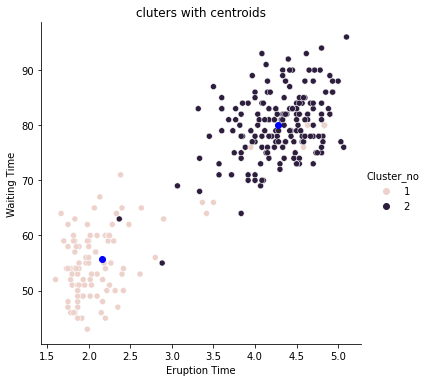

In [500]:
finalcentroidx= [2.164039215686274, 4.282029411764707] 
finalcentroidy= [55.64705882352941, 80.04705882352941]

sns.relplot(data= df1, x='eruptions', y='waiting', hue='Cluster_no')
plt.scatter(finalcentroidx, finalcentroidy, c='Blue', marker='o')
plt.title("cluters with centroids")
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time")

#### (c) A plot of the k-means objective function versus iterations of the algorithm. 

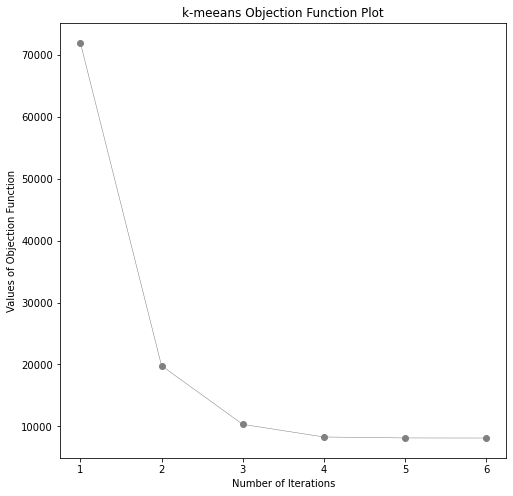

In [565]:
xpoints = [1,2,3,4,5,6]
ypoints = [71944.04235730288,19801.920352691177,10338.472866706688,8298.521047775386, 8140.271418308415, 8127.932168658103]

fig, ax = plt.subplots(figsize= (8, 8))
ax.plot (xpoints, ypoints, color='grey', linestyle='-', linewidth= 0.5)
plt.scatter(xpoints, ypoints, c='grey', marker='o')
plt.title("k-meeans Objection Function Plot")
plt.xlabel("Number of Iterations")
plt.ylabel("Values of Objection Function")
plt.show()

#### (d)	Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?

Yes, It did, perfectly!